In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

In [6]:
#Liquid properties
rho = 1e3
mu = 8.9e-4
sigma=0.072

#Ambient COnditions
p_atm = 1e5

#Polytropic coeff
gamma=1.33

In [157]:
#initial Condition
#Bubble
R_0 = 2e-6
u_0 = 0
#Membrane
Rm_0 = 1.2*R_0
um = 0

In [158]:
#partial pressure of air at eqb
p_g0 = p_atm + 2 * sigma/R_0

In [419]:
#pressure at infty as a function of time
omega_N = (1/R_0)*np.sqrt(3*gamma*p_g0/rho-2*sigma/R_0/rho);
omega = 2*omega_N


N = omega_N/2/np.pi
p_a = 1.0*p_atm
def p_infty (t):
    p_it = p_atm + p_a*np.sin(omega*t)
    return p_it
#partial pressure of air as a function of R
def p_gas(R):
    p_g = p_g0*np.power(R_0/R, 3*gamma);
    return p_g

In [461]:
dt = 0.00000000025
time = np.arange(0, 200*np.pi/omega, dt)
ones = np.ones(len(time));

#Random values
K1 = 0.1;
K2 = 0.1;
k1 = K1*omega*Rm_0**2*np.sqrt(p_a*rho)/R_0**2
k2 = K2*Rm_0**2*np.sqrt(p_a*rho)/R_0**2

#d/dt (x) = equation(x,t)
def equation(x, t):
    (R,u,Rm) = x;
    um = R**2*u/Rm**2;
    udot = (p_gas(R)-p_infty(t)-2*sigma/R-4*mu*u/R + k1*(Rm-Rm_0) + k2*(um))/(R*rho)-3*u**2/(2*R)
    return (u, udot, um)

In [462]:
#solving ODE
R_1 = odeint(equation, [R_0, u_0, Rm_0], time)


In [463]:
#plot
V = R_1[:,1]
R = R_1[:,0]
Rm = R_1[:,2]
mtimes = time/(2*np.pi/omega_N)

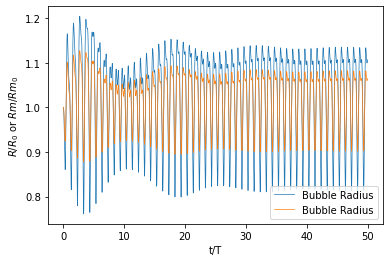

In [464]:
#plot results

fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("$R/R_0 $ or $Rm/Rm_0$")
ax1.plot(mtimes, R/R_0, linewidth = 0.7, label = "Bubble Radius")
ax1.plot(mtimes, Rm/Rm_0, linewidth = 0.7, label = "Bubble Radius")


ax1.legend(loc = "lower right")

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.xlim(0,2);
#plt.ylim(0,2);
plt.show()

In [465]:
dR_amplitude = R_0*(p_a/(rho*R_0**2))/np.sqrt((omega**2-omega_N**2)**2 - (omega*4*mu/rho/R_0**2)**2) 
print(dR_amplitude)
omega_P = np.sqrt(omega_N**2-0.5*(4*mu/rho/R_0**2)**2)
print(omega_P/omega_N)
#Wp_amplitude = R_0*(p_a/(4*mu)/np.sqrt(omega_P**2+ 4*(mu/rho/R_0**2)**2))
Wp_amplitude = R_0*(p_a/(4*mu)/np.sqrt(omega_N**2- 4*(mu/rho/R_0**2)**2))
print(Wp_amplitude)

1.0865275078868842e-07
0.9987096904392035
4.536354571617624e-06


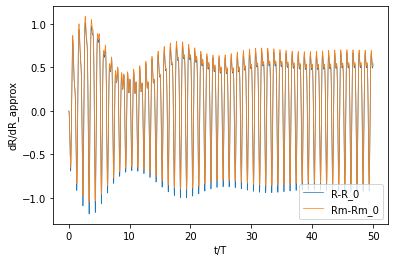

In [466]:
#dR = (R-1)*R_0/dR_amplitud-amplitudee
dR_approx = np.sqrt(p_a/rho)/omega
dRm_approx = (R_0/Rm_0)**2*np.sqrt(p_a/rho)/omega
dR = (R_1[:,0]-R_0*ones)/(dR_approx);
dRm = (R_1[:,2]-Rm_0*ones)/(dRm_approx);
#plot results

fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("dR/dR_approx")
ax1.plot(mtimes, dR, linewidth = 0.7, label = "R-R_0")
ax1.plot(mtimes, dRm, linewidth = 0.7, label = "Rm-Rm_0")


ax1.legend(loc = "lower right")

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.xlim(0,2);
#plt.ylim(0,2);
plt.show()

In [467]:
from numpy.fft import fft, ifft, fftshift, fftfreq

def show_transform(x, y):
    """
    Plot y(x) and its transform.
    
    y can be real or complex.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    fy = fftshift(fft(y))
    freqs = fftshift(fftfreq(len(x), d=(x[1] - x[0])))    
    fig, axs = plt.subplots(nrows=2, constrained_layout=True)

    for ax in axs:
        ax.margins(x=0.05, y=0.1)
        ax.grid(True)
        ax.locator_params(symmetric=True)
        # (Line above doesn't seem to be working as expected...)
            
    ax = axs[0]
    if y.dtype.kind == 'c':
        ax.plot(x, y.real, 'r+', x, y.imag, 'bx')
    else:
        ax.plot(x, y, 'k.')
    ax.set_xlabel("Time")
    
    ax = axs[1]
    ax.plot(freqs/N, np.abs(fy), 'ko', mfc='none', label='amp')
    ax.plot(freqs/N, fy.real, 'r+', label='real')
    ax.plot(freqs/N, fy.imag, 'bx', label='imag')

    ax.set_xlabel("Frequency, cycles per unit time")
    ax.legend(loc="best", 
                  numpoints=1,
                  fontsize='small')
    

    return fig, axs 

(0.0, 4.0)

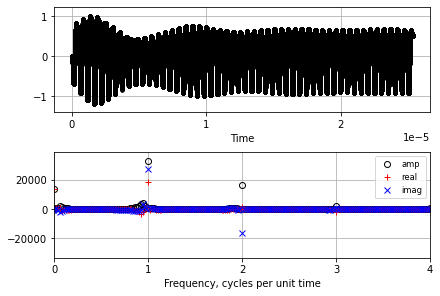

In [470]:
show_transform(time, dR)

plt.xlim(0, 4)

(0.0, 4.0)

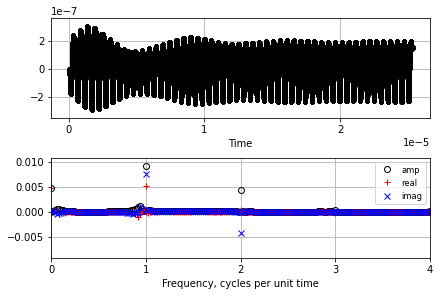

In [469]:
show_transform(time, Rm-Rm_0)
plt.xlim(0, 4)